<a href="https://colab.research.google.com/github/Gloou-ui/NM/blob/main/%D0%9B%D0%A0_13_%D0%A7%D0%9C_%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD_%D0%9C%D0%B8%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

Метод Ейлера:
x = [0.  0.2 0.4 0.6 0.8 1. ]
y = [1.     1.0626 1.169  1.3217 1.5233 1.7766]

odeint (точний чисельний розв'язок):
y = [1.     0.9036 0.8331 0.7908 0.7775 0.7921]

Похибка методу Ейлера:
max = 0.9844999999999999
mean = 0.45935


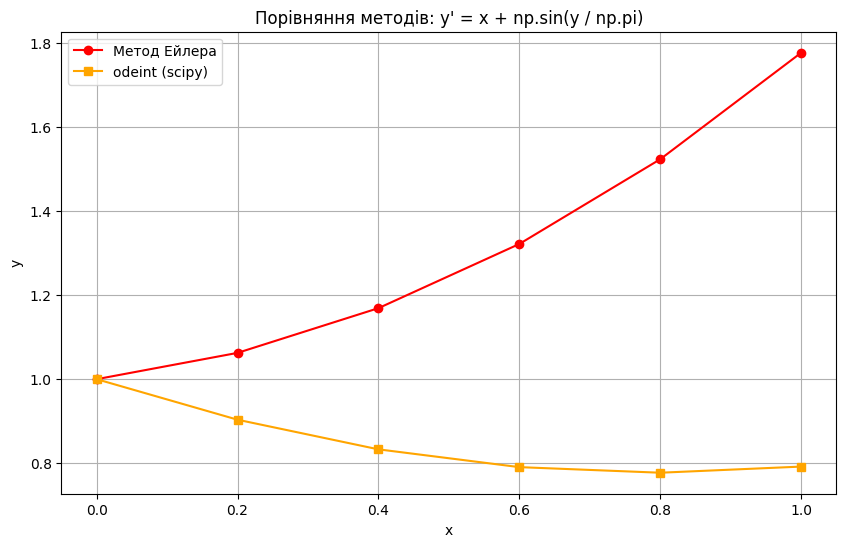

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, x):
    return x + np.sin(y / np.pi)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0, 1, 0.2, 1

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h)  # кількість кроків
x = np.linspace(a, b, n + 1)
y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(y[i], x[i]) * h
y_euler = np.round(y, 4)

print("Метод Ейлера:")
print("x =", x)
print("y =", y_euler)
print()

def f_odeint(y, x):
    return np.sin(x) - np.cos(y)

x_ode = x  # ті ж точки
y_odeint = odeint(f_odeint, y0, x_ode).flatten()
y_odeint = np.round(y_odeint, 4)

print("odeint (точний чисельний розв'язок):")
print("y =", y_odeint)
print()

error = np.abs(y_euler - y_odeint)
print("Похибка методу Ейлера:")
print("max =", np.max(error))
print("mean =", np.mean(error))

plt.figure(figsize=(10, 6))
plt.plot(x, y_euler, 'o-', label="Метод Ейлера", color='red')
plt.plot(x, y_odeint, 's-', label="odeint (scipy)", color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння методів: y' = x + np.sin(y / np.pi)")
plt.legend()
plt.grid(True)
plt.show()


#Метод Ейлера-Коші

Метод Ейлера-Коші:
x = [0.  0.2 0.4 0.6 0.8 1. ]
y = [1.     1.1446 1.2752 1.3922 1.4962 1.5881]

solve_ivp (RK45):
y = [1.     1.145  1.2759 1.3931 1.4973 1.5895]

Похибка методу Ейлера-Коші:
max = 0.0013999999999998458
mean = 0.0007499999999999915
RMS = 0.0008784455968736083


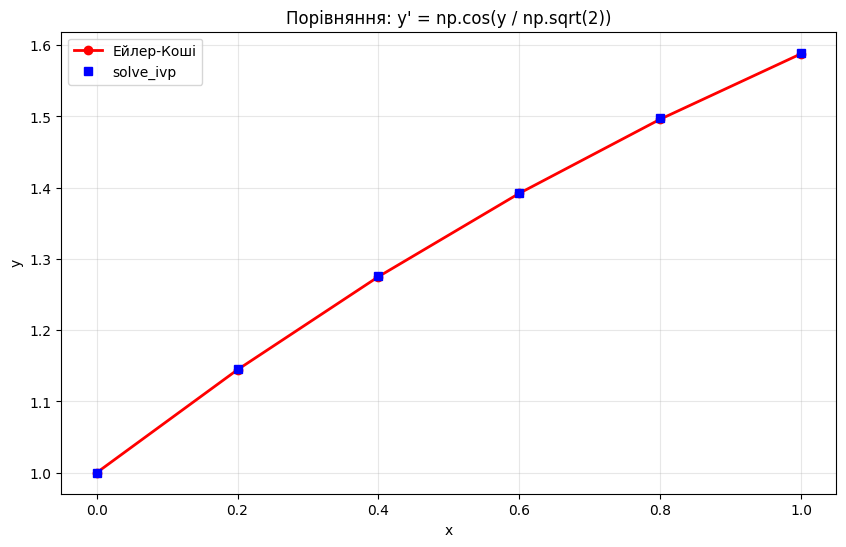

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, y):
    return np.cos(y / np.sqrt(2))

a = 0  # ліва межа відрізку
b = 1  # права межа відрізку
h = 0.2  # крок
y0 = 1  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h/2, h)  # Виправлено для точного включення b
if x[-1] > b:
    x = x[:-1]

y = np.empty(len(x))
y[0] = y0

# Метод Ейлера-Коші
for i in range(len(x)-1):
    k1 = f(x[i], y[i])
    k2 = f(x[i+1], y[i] + h * k1)
    y[i + 1] = y[i] + (k1 + k2) * h / 2

y_euler = np.round(y, 4)

print("Метод Ейлера-Коші:")
print("x =", x)
print("y =", y_euler)
print()

sol = solve_ivp(f, [a, b], [y0], t_eval=x, method='RK45', rtol=1e-6)
y_solve_ivp = np.round(sol.y[0], 4)

print("solve_ivp (RK45):")
print("y =", y_solve_ivp)
print()

error = np.abs(y_euler - y_solve_ivp)
print("Похибка методу Ейлера-Коші:")
print("max =", np.max(error))
print("mean =", np.mean(error))
print("RMS =", np.sqrt(np.mean(error**2)))

plt.figure(figsize=(10, 6))
plt.plot(x, y_euler, 'o-', label="Ейлер-Коші", color='red', linewidth=2)
plt.plot(x, y_solve_ivp, 's', label="solve_ivp", color='blue', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння: y' = np.cos(y / np.sqrt(2))")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [1.         1.08492577 1.21630748 1.39685327 1.6292245  1.91589065]


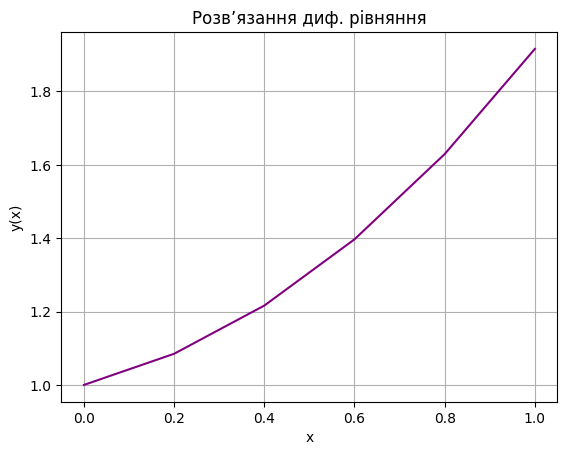

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y / np.pi)

# Початкова умова
y0 = 1

# Значення x
x = np.array([i * 0.2 for i in range(0, 6)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, color='purple')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [1.         1.16437014 1.35047045 1.5539813  1.77105364 1.99834795]


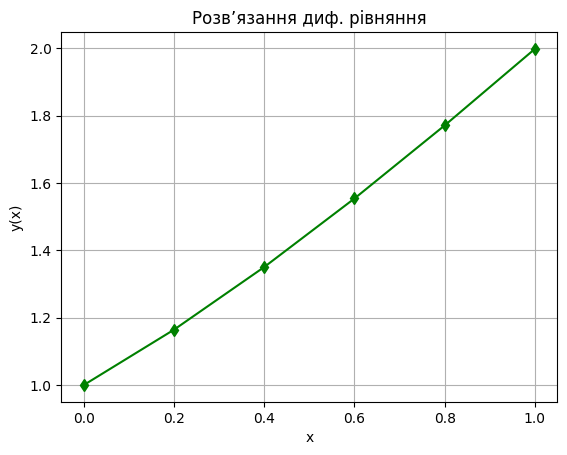

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y / np.sqrt(2))

# Початкова умова
y0 = [1]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 6)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='d', color='green')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
